
# Project: Investigate a Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 
This multivariate data set contains some important and insightful information of about 10,000 movies collected from The TMDB Movie Databas. It has a number of data points some of which includes user ratings and revenue. 

It has fields hosted in columns such as 
- Popularity Ratings
- Budget for the movies 
- Revenue of the movies budgeted 
- Cast information 
- Genres
- Release Year
- Vote  Average. can help answer questions like predicting movies that are most popular/highly rated?, which genres of movies from the dataset

### Dataset Description 
This data set has the following characteristics which helps us to understand it better.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column. We were informed not to worry about altering or cleaning them as it was intentionally formatted. 

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars. 
This accounts for inflation over time.


### Question(s) for Analysis
Some Key Questions to be answered in this analysis include 
- What movies has been worked on more from year to year? 
- Which genres have been most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- Does the number of movies a certain Director has worked on determine how popular/succesful his movie can be?


In [1]:
# I will first import all of the packages that I will be using for my analyses.

!pip3 install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I will use this section to Import my dataset, look for abnormalities and trim extremities to ensure it is homogenous.

### General Properties

In [2]:
# Loading my data 

df = pd.read_csv('tmdb-movies.csv')
df.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here, the first five rows of our Datasets above with their columns in view gives us more coverage to learn more about the dataset.

In [3]:
df.shape

(10866, 21)

The shape function tells us our dataset is made of 10866 rows and 21 columns some columns that are not needed have to be dropped to make the dataset have more integrity and less noise.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

From the unique release years, we can base analysis from 2010 to 2015 for the latest trend in 5 years. We'll see as we go on wrangling data.

In [6]:
df.drop(['imdb_id', 'keywords', 'overview', 'tagline', 'homepage'], axis = 1, inplace = True)

As we observed from the dataset with shape function,we have 21 columns and have to drop columns that won't be relevant to the questions and conclusions.

In [7]:
# As we observed from the dataset with shape function.
# We have 21 columns from the dataset and I have decided to drop 5 columns that are not integral to my analysis.
# Let's see if it worked.

df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


It did!

In [8]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Once we have completed dropping the unrelevant/erraneous columns, the next is cleaning method of Missing values in some of our columns. Columns such as genres,cast, director has missing values and we need to clean them. 

I also noticed in Budget, we have some rows that are with 0 budget. This might imply that the movie is a no budget movie - this means that we can make an informed assumption that there safe to say, no revenue as well.

### Data Cleaning

In [9]:
# after dropping unrelevant/erraneous columns next is cleaning method of Missing values in some of our columns. 
# Columns such as genres cast, director has missing values and we need to treat and clean them, 
# I also noticed in Budget. we have some rows that are with O budget, 
#this might imply that the movie is a no budget movie safe to say, no revenue as well

df.fillna('Anonymous', inplace=True)

We then take note that all missing values occur in all the text(string) columms. This implies that are likely have to fillna with a string. In this case, we use Anonymous so as not remove any row with vital information.

In [10]:
# Take note that all missing values occur in all the text(string) columms implying we might likely have to fillna with a string, 
# In this case Anonymous so as not remove any row with vital info,

# Then I will change the d.type of release date and release year to date and time format
# This will help solve our problem of data inconsistency

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.to_datetime(df['release_year'])


In [11]:
# Probe Data
# Need to know if theres any duplicate row or data
df.duplicated().sum()

# Drop duplicate
df.drop_duplicates(inplace = True)

#confirm changes in the dataset
df.info

<bound method DataFrame.info of            id  popularity     budget     revenue  \
0      135397   32.985763  150000000  1513528810   
1       76341   28.419936  150000000   378436354   
2      262500   13.112507  110000000   295238201   
3      140607   11.173104  200000000  2068178225   
4      168259    9.335014  190000000  1506249360   
5      281957    9.110700  135000000   532950503   
6       87101    8.654359  155000000   440603537   
7      286217    7.667400  108000000   595380321   
8      211672    7.404165   74000000  1156730962   
9      150540    6.326804  175000000   853708609   
10     206647    6.200282  245000000   880674609   
11      76757    6.189369  176000003   183987723   
12     264660    6.118847   15000000    36869414   
13     257344    5.984995   88000000   243637091   
14      99861    5.944927  280000000  1405035767   
15     273248    5.898400   44000000   155760117   
16     260346    5.749758   48000000   325771424   
17     102899    5.573184  13000

To check if there are rows that are identical completely, if True, one or two of the rows had to be dropped making it easy for us to draw insight from the dataset in a nutshell remove duplicated row.

After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis
In this phase, we will find patterns in our dataset, build intuition about our work and visualise relationship in our data by looking at visual connection.

### Research Question 1 - Distribution of Movie Revenue

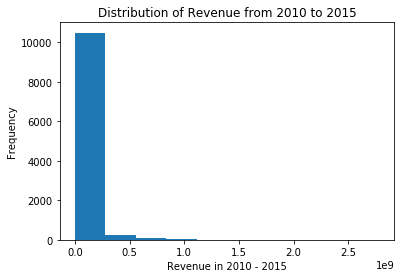

In [55]:
# How has the distribution of Revenue from 2018 to the current year changed using histogram

def hist_plot_by(x, title, xlabel, ylabel):
  # A function to draw a hist0gram 
     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_title(title)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()
hist_plot_by(df['revenue'], 'Distribution of Revenue from 2010 to 2015','Revenue in 2010 - 2015','Frequency')

**Inference:** From this scatter plot, we can see that revenue is a positively right skewed distribution for the years considered.

### Research Question 2 - Distribution of Movie Revenue

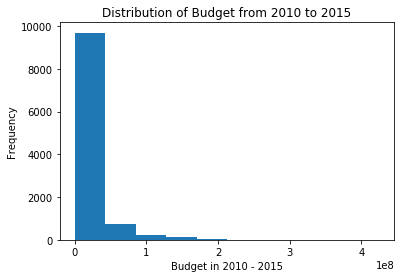

In [52]:
# How has the distribution of budget from 2018 to the current year changed due to inflation

hist_plot_by(df['budget'], 'Distribution of Budget from 2010 to 2015','Budget in 2010 - 2015','Frequency')

**Inference:** From this histogram, we can see that also see that Budget is a right skewed distribution for the years considered.

### Research Question 3 - Vote Count by PopuLarity

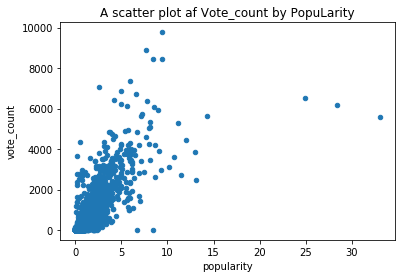

In [14]:
df.plot(x='popularity', y='vote_count', kind='scatter');
plt.title('A scatter plot af Vote_count by PopuLarity');

**Inference:** We are going to use a scatterplot visualization to see if there is a positive correlation with popularity column and vote_count column, in addition this is a scatter plot that helped show relationship between 2 variables
and from the viz we can depict that there was somewhat a positive correlation between popularity and vote_count.

### Research Question 4 - Revenue by PopuLarity

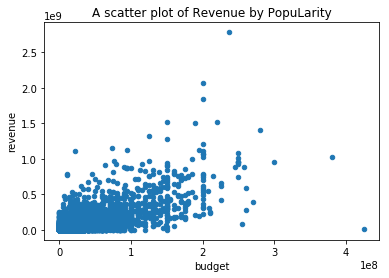

In [15]:
df.plot(x='budget', y='revenue', kind='scatter');
plt.title('A scatter plot of Revenue by PopuLarity');

**Inference:** This visualization - Revenue by Budget, tries to also see if both variables are correlated, this help explain why some rows that were with zero budget had zero Revenue.

In [16]:
df.nunique()

id                      10865
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
director                 5068
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Using this chart to predict movies that are popular or highly rated.

In [17]:
df_hr = df.nlargest(5, columns= ['popularity'])

Here, using nlargest function to get the highly rated/most popular movie by popularity according to tmab, they calculate their popular movies through votes submitted by their users(vote_average)

In [18]:
df_hr

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,1970-01-01 00:00:00.000002014,1.519800e+08,5.726906e+08
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,1970-01-01 00:00:00.000002014,1.565855e+08,7.122911e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08


In [19]:
# selecting our columns to plot

df_hr.iloc[: , np.r_[1,4]]

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent


### Research Question 4 - Most Critically Acclaimed Movies

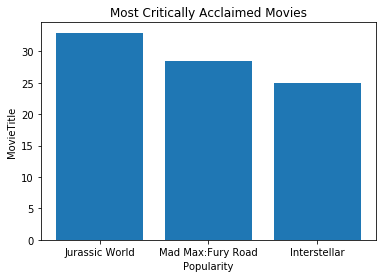

In [20]:
plt.bar([1,2,3], [32.985763, 28.419936, 24.949134] )
plt.xticks([1,2,3], ['Jurassic World', 'Mad Max:Fury Road', 'Interstellar'] )
plt.title('Most Critically Acclaimed Movies')
plt.xlabel('Popularity');
plt.ylabel('MovieTitle');
plt.show()

In [21]:
df_gc = df.genres.value_counts()
df_g = df_gc.to_frame()
df_g

,genres
Drama,712
Comedy,712
Documentary,312
Drama|Romance,289
Comedy|Drama,280
Comedy|Romance,268
Horror|Thriller,259
Horror,253
Comedy|Drama|Romance,222
Drama|Thriller,138


### Research Question 5 - All Round Top Movies Based on Genre

In [22]:
df1 = df_g.nlargest(10,columns = ['genres'])

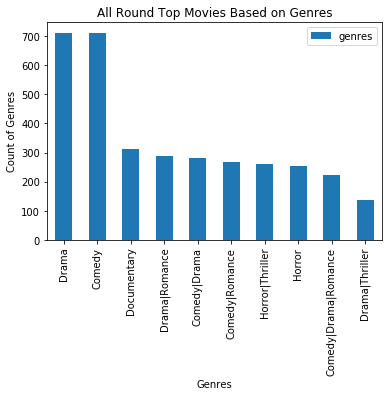

In [23]:
df1.plot(kind = 'bar')
plt.title('All Round Top Movies Based on Genres')
plt.xlabel('Genres');
plt.ylabel('Count of Genres');
plt.show()

Since genre mixing (bending) being common nowadays, which genres of movies have film makers worked on more for years?, knowing fully well more of making these genres might increase the users fondness to these genres.

In [24]:
df_dc= df['director'].value_counts()
df_d= df_dc.to_frame()
df_d

,director
Woody Allen,45
Anonymous,44
Clint Eastwood,34
Steven Spielberg,29
Martin Scorsese,29
Ridley Scott,23
Ron Howard,22
Steven Soderbergh,22
Joel Schumacher,21
Brian De Palma,20


I wanted to base my analysis for this Research question from 2010 to 2015 to help streamline my prediction, but value_counts function helped to aggregate the unique Genres of movies from the year 1966 to 2015 as shown above.

### Research Question 6 - Director with the Most Number of Featured Movies

In [30]:
df1 = df_d.nlargest(4, columns = ['director'])

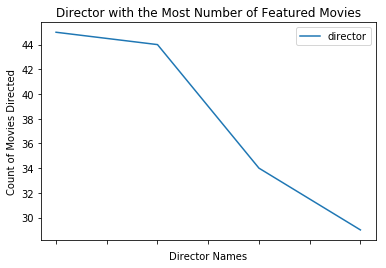

In [31]:
df1.plot(kind = 'line')
plt.title('Director with the Most Number of Featured Movies')
plt.ylabel('Count of Movies Directed');
plt.xlabel('Director Names');
plt.show()

Above, we plotted count of movies against top(4) Director names to try to ascertain that director that has worked on a high number of movies and do a comparison with the Director that produced the popular movie "Jurassic World' which we got from our analysis. The Comparison was made to actually check if the number of movies a director has produced is a necessary factor in
making his moves successful or rated highly This graph tells us this is not the case.

<a id='conclusions'></a>
## Conclusions

**Drawing Inference and Making Recommendations**

From the visualisation showing directors with the number of movies they have worked on we observed that Director Woody Allen has a directed a ct of movies but the most popular / highly rated movie - Jurassic World which we got from our analysis was directed by a Colin Trevorrow This gives us a little certainty to our question that irrespective of the number of movies a director has worked on its not a quarantee that his movies will alivays be highly rated. But notice the downward nature of the line graph does this mean we have a lot of directors now making it more competitive out there for one Director to direct a lot of movies?

The Most popular movies were measured with respect to popularity column owing to the fact that tmdb calculates their Popular movies with the vote averages gotten from the vote counts of users So having the highest rating for the popularity column, shows the popularity of a movie which was "Jurassic World', 'Mad Max Fury Road' and so on in thar order.

Which genre of movie has been produced more throughout?. Please note that Genre mixing is common in recent times and also heip to show case how creative a Director can be.Hence the reason why each definite genre were not seperated(split) when doing my analysis. Notice how close Genre types 'Comedy and Drama" are to each other as the top most genre of movies film-makers produce. Also Genre mix Drama/Romance.Comedy/Drama are also in the mix of high produced genres. One thing is certain, most viewers love to laugh and Comedy genre is popular among film-makers.


### LIMITATIONS
The missing values in most of the columns tried to hinder my analysis for the Directors with Most movies worked on as i had to fill the empty and missing rows with "Anonymous" which was seen on the viz. This signify no data was collected as to who produced some movies in the dataset and might as well have had an effect on the outcome of if Director Woody Allen actually had the highest movies made or worked on. Hence making the ASSERTION that highest number of movies directed by a director means he is really prolific and critically acclaimed. 

### References 
[Udacity Project Guide] (https://video.udacity-data.com/topher/2021/April/60836404_data-analyst-project-cheat-sheet/data-analyst-project-cheat-sheet.pdf)

## Submitting my Project 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])